## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Merge the two DataFrames together based on the Dates they share
all_mice_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
#all_mice_data.head()

In [2]:
#mouse_metadata.head()   # Shows you the mouse_metadata original columns pre merge

In [3]:
#study_results.head() # Shows you the study_results original columns pre merge

In [4]:
all_mice_data=pd.DataFrame(all_mice_data)
all_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
#Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. 
#Try answering questions like:

#How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

#How do I build a basic scatter plot?

#How do I add a label to that scatter plot?

#Where would the labels for that scatter plot come from?

In [6]:
#all_mice_data.columns #show the names of the current columns

In [7]:
# Checking the number of mice. 
mice_count=len(all_mice_data["Mouse ID"].unique())
mice_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Check the data for any mouse ID with duplicate Timepoint
#PortlandCrime Solved  also #Cleaning Data 04-Pandas/2/Activities/03-Ins_CleaningData/Solved/CleaningData.ipynb
#duplicates= all_mice_data.duplicated(subset=(['Mouse ID', 'Timepoint']))

#duplicates= all_mice_data.duplicated(subset=(['Mouse ID']))
#duplicats.loc[True]
#duplicates.head() Will show False 
#all_mice_data.loc[duplicates, 'Mouse ID']
#duplicates.count()

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 


In [10]:
#by default it removes duplicate rows based on all columns
#to remove duplicates on specific column(s), use subset
#to remove duplicates and keep last occurences, use keep
#df = pd.DataFrame({
#    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
#    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
#     'rating': [4, 4, 3.5, 15, 5]
#})
#df

In [11]:
#To remove duplicates and keep last occurrences, use keep.
#df.drop_duplicates(subset=['brand', 'style'], keep='last')

#df.drop_duplicates(subset=['brand'])

In [12]:
#all_mice_data.dtypes

In [13]:
clean_mice=all_mice_data.sort_values(by=['Mouse ID', 'Timepoint'])
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#dup_mice=df.drop_duplicates(all_mice_data(subset= ['Mouse ID'], keep ="last"))

#clean_mice_data=df.drop_duplicates(subset=['Mouse ID', keep='False')
#clean_mice_data
# where to put the df you are calling. 
#the way to remember is whenever you see a method, look to the left of the .
clean_mice_df = all_mice_data.drop_duplicates(subset=['Mouse ID'], keep="last")
clean_mice_df
#clean_mice is a new DataFrame, we will call this df for the statistical analysis

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [159]:
# Checking the number of mice in the clean DataFrame.

clean_mice_count=len(all_mice_data["Mouse ID"].unique())
clean_mice_count

249

## Summary Statistics

In [160]:
#Delta Degrees of Freedom: int, default 1 
# start with the variance, this means you take negative values and make them absolute, in either direction it becomes a positive occurance
# standard deviation is a measure of distance, it doesn't care about the direction. The variance will remove the negatives so you can find standard deviation

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This will do it using numpy. But we have been asked to use scipy.stats
mean_clean_mice= np.mean(clean_mice_df.loc[:, "Tumor Volume (mm3)"]) #need to reference just the tumor volume for each regimen
print(f" The mean of the clean mice data set is {mean_clean_mice}")

#print(clean_mice_count["Tumor Volume (mm3)"].mean())

mean_mice=clean_mice_df["Tumor Volume (mm3)"].mean()
mean_mice
#median_numpy =.np.mediean(some variable)

#median_clean_mice= np.median(clean_mice_df.loc[:, "Tumor Volume (mm3)"])
#print(f" The median _____ is {mean_numpy}")
#median_mice=clean_mice_df["Tumor Volume (mm3)"].median()
#median_mice

#var_numpy =np.var(some_variable, ddof=0)
#degrees of freed
#print(f" The mice variance using the NumPy modules is {var_numpy}")

#sd_numpy = np.std(temperatures,ddof = 0)
#print(f"The ____ standard deviation using the NumPy module is {sd_numpy}")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



 The mean of the clean mice data set is 54.99913687738955


54.99913687738955

In [186]:
#median_clean_mice= np.median(clean_mice_df.loc[:, "Tumor Volume (mm3)"])
#print(f" The median _____ is {mean_numpy}")
median_mice=clean_mice_df["Tumor Volume (mm3)"].median()
median_mice

55.84141007

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [188]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


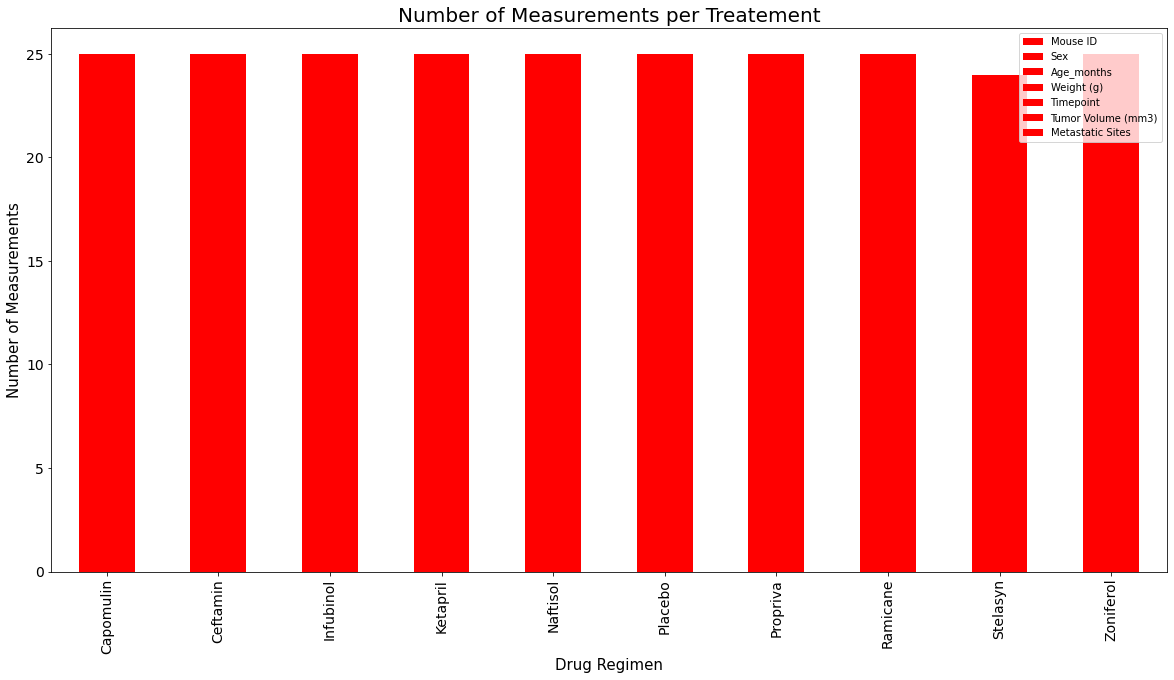

In [189]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# x-axis different regimens 
#y- axis all the measurements w/ multiple measurements per mouse (clean_mice_df)
number_of_measurements=clean_mice_df.groupby(["Drug Regimen"]).count() #["Timepoint"]

###Stelasyn only has 24, the rest have 25

plot=number_of_measurements.plot.bar(figsize=(20,10), color='r', fontsize=14)
number_of_measurements
#when kind is 'bar' by default the x_axis is going to be the index of the data_frame, we assign it to a different Series "Drug Regimen" below.
# the columns will be the bars, unless we specifiy only one Series ('Number of Measurements')
#x_axis drug regimen will put each drug in its own respective column with a bar chart
plt.xlabel("Drug Regimen", fontsize= 15)
#y label will show how many measurements were taken
plt.ylabel("Number of Measurements", fontsize=15)
#this will give you a nice title
plt.title("Number of Measurements per Treatement", fontsize=20)

# if need to save
# Save an image of the chart and print it to the screen
#plt.savefig("../Pymaceuticals-/num_measure_regimen.png")
#plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [16]:
clean_mice_df.loc[:, ['Mouse ID', 'Sex']].groupby('Sex').count()
#use df.loc[all rows, [2 Series]].group it by (the 'Sex' series)then count

,Mouse ID
Sex,
Female,124
Male,125


In [18]:
#clean_mice_df.loc[:, 'Sex'].value_counts() #another way to see the m/f counts not in a table

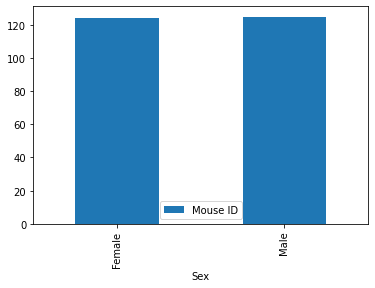

In [20]:
clean_mice_df.loc[:, ['Mouse ID', 'Sex']].groupby('Sex').count().plot(kind='bar')

In [27]:
mice_sex=clean_mice_df.loc[:,'Sex']=clean_mice_df['Sex'].apply(str)
print(mice_sex.dtypes)
#this should have converted the 'Sex' Series to a string 

object


In [28]:
clean_mice_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_mice_df.plot(y='Mouse ID', x='Sex', kind='pie')
plt.show()
# need to convert Sex to Str or MouseID to int

TypeError: '<' not supported between instances of 'str' and 'int'

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# A box plot is a nice way to check to see if there are any outliers in the dataset (slack)

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
